In [2]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
#przedział funkcji
a = -4 * math.pi
b = 3 * math.pi
#liczba punktów na wykresach i przy obliczaniu błędów
points = 1000

In [4]:
def func_plot(fn, a, b, n, label='', color='', figsize=(6, 4), subplot=None, title=''):
    if subplot is None:
        fig, ax = plt.subplots(figsize=figsize)
    else:
        ax = subplot
    xs = np.linspace(a, b, num=n)
    ys = [fn(xi) for xi in xs]
    if color:
        ax.plot(xs, ys, label=label, color=color)
    else:
        ax.plot(xs, ys, label=label)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    if label:
        ax.legend(loc="best")
    if title:
        ax.set_title(title)

In [5]:
def create_compare_errors_table(data):
    df = pd.DataFrame(data, index=["Błąd bezwzględny", "Błąd średniokwadratowy"])
    return df

In [6]:
def create_compare_errors_table_2(x, y):
     df = pd.DataFrame(x, index=y)
     return df


In [7]:
def max_absolute_error(f, W, xs, rounded=True):
    if rounded:
        return round(max([abs(f(x) - W(x)) for x in xs]),4)
    return max([abs(f(x) - W(x)) for x in xs])

In [8]:
def mse(f, W, xs, rounded=True):
    if rounded:
        return round(sum([(f(x) - W(x)) ** 2 for x in xs]) / len(xs), 4)
    return sum([(f(x) - W(x)) ** 2 for x in xs]) / len(xs)

In [9]:
def calc_a_b(xs, ys, n, m):
    A = [0 for _ in range(m+1)]
    B = [0 for _ in range(m+1)]
    for i in range(m+1):
        A[i] = 2/n*sum(ys[j] * math.cos(i * xs[j]) for j in range(n))
        B[i] = 2/n*sum(ys[j] * math.sin(i * xs[j]) for j in range(n))
    return A, B

def transform_x(x, xs):
    a = xs[0]
    b = xs[-1]
    a_trans = -math.pi
    b_trans = math.pi
    return ((x - a) / (b - a)) * (b_trans - a_trans) + a_trans

def trigonometric_approximation(xs, ys, m):
    n = len(xs)
    transformed_xs = [transform_x(x, xs) for x in xs]
    A, B = calc_a_b(transformed_xs, ys,n, m)
    def func(x):
        x_transformed = transform_x(x, xs)
        return  1/2 * A[0] + sum(A[j] * math.cos(j * x_transformed) + B[j] * math.sin(j * x_transformed) for j in
                                 range(1, m+1))
    return func


In [10]:
def display_approximation(f,a,b,n,ms, approximation, labels, colors=[], title=''):
    xs = np.linspace(a,b, points)
    xs_approximation = np.linspace(a,b,n)
    ys_approximation = [f(x) for x in xs_approximation]
    fig, ax = plt.subplots(figsize=(6, 4))
    func_plot(f, a, b, 1000, label="F(x)", subplot=ax)
    ax.plot(xs_approximation, ys_approximation, 'o', c="r")
    approximation_errors = {}
    while len(colors) < len(ms):
        colors.append('')
    # if len(labels) == 0:
    #     for m in ms:
    #         print("m jest rowne: ", m, "\n")
    #         labels.append(f"m={m}")
    for i in range(len(ms)):
        labels.append(f"m={ms[i]}")
    print(labels)
    for i in range(len(ms)):
        approximation_func = approximation(xs_approximation, ys_approximation, ms[i])
        func_plot(approximation_func, a, b, 1000, label=labels[i], color=colors[i],title=title, subplot=ax)
        approximation_errors[labels[i]] = [max_absolute_error(f, approximation_func ,
                                                                                              xs), mse(f,
                                                                                                             approximation_func ,xs)]
    plt.show()

    display(create_compare_errors_table(approximation_errors))

def create_error_table(approximation,ms, ns, count_mse=True, rounded=True):
    xs = np.linspace(a,b, points)
    approximation_errors = {}
    for i in range(len(ns)):
        errors = []
        for j in range(len(ms)):
            if False:
                pass
            # if ms[j] >ns[i] or ms[j]>30:
            #     errors.append(0)
            else:
                xs_approximation = np.linspace(a,b,ns[i])
                ys_approximation = [f(x) for x in xs_approximation]
                approximation_func = approximation(xs_approximation, ys_approximation, ms[j])
                if count_mse:
                    errors.append(mse(f, approximation_func ,xs, rounded=rounded))
                else:
                    errors.append(max_absolute_error(f, approximation_func, xs, rounded=rounded))
        approximation_errors[ns[i]] = errors
    for key in approximation_errors.keys():
        for i in range(len(approximation_errors[key])):
            if ms[i] <= ns[0]:
                print(approximation_errors[key][i])

    display(create_compare_errors_table_2(approximation_errors, [m for m in ms]))

In [11]:
def find_best_approximation(f,a,b,n,approximation,to, start=2,w=[]):
    xs = np.linspace(a,b, points)
    xs_approximation = np.linspace(a,b,n)
    ys_approximation = [f(x) for x in xs_approximation]

    results = []
    for i in range(start, to+1):
        approximation_func = approximation(xs_approximation, ys_approximation, i)
        error = mse(f,approximation_func ,xs)
        results.append((error, i))
        # if(error<min_error):
        #     min_error=error
        #     best_m=i
    return sorted(results)


In [12]:
f = lambda x, k=4, m=1: math.exp(-k * math.sin(m * x)) + k * math.sin(m * x) - 1

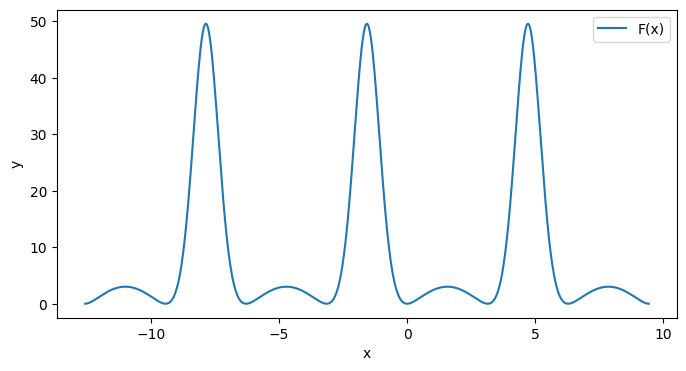

In [13]:
func_plot(f, a, b, 1000, label="F(x)", figsize=(8,4))

['m=3', 'm=4']


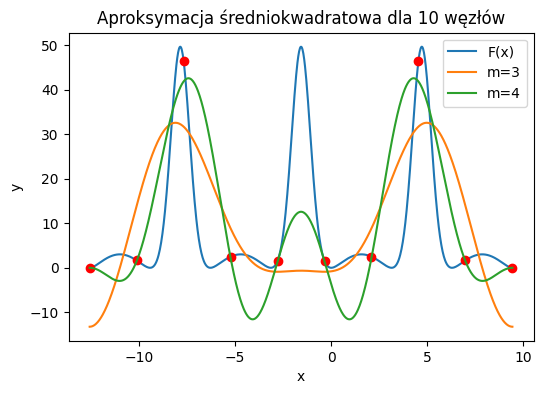

,m=3,m=4
Błąd bezwzględny,50.2330,37.0141
Błąd średniokwadratowy,251.6132,211.1870


In [17]:
n=10
m=[3,4]
display_approximation(f, a,b,n,m, trigonometric_approximation, labels=[],title=f"Aproksymacja średniokwadratowa dla {n} węzłów"
                                                           ,
                      )

['m=9', 'm=10']


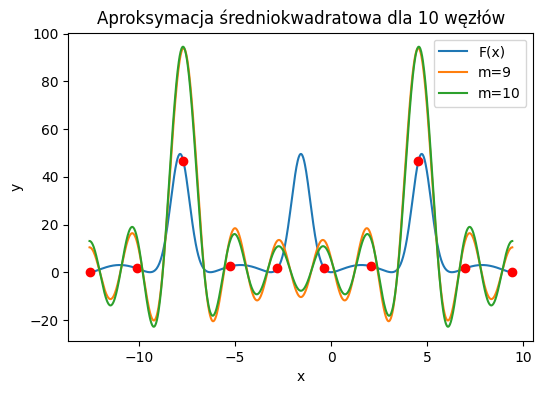

,m=9,m=10
Błąd bezwzględny,60.0082,57.3644
Błąd średniokwadratowy,445.5468,436.6978


In [19]:
n=10
m=[9,10]
display_approximation(f, a,b,n,m, trigonometric_approximation, labels=[],title=f"Aproksymacja średniokwadratowa dla {n} węzłów"
                                                           ,
                      )

['m=3', 'm=4', 'm=5']


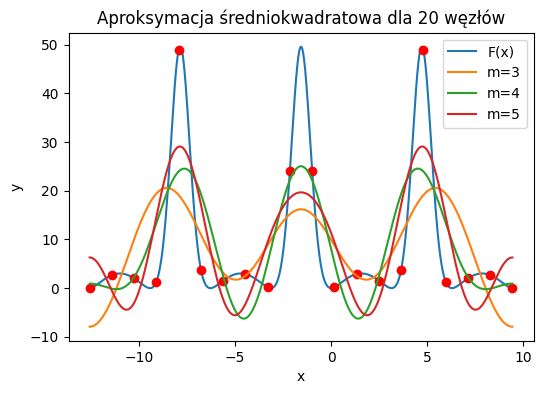

,m=3,m=4,m=5
Błąd bezwzględny,33.3901,25.3567,29.9077
Błąd średniokwadratowy,143.4580,97.1268,94.4257


In [20]:
n=20
m=[3,4,5]
display_approximation(f, a,b,n,m, trigonometric_approximation, labels=[],title=f"Aproksymacja średniokwadratowa dla {n} węzłów"
                                                           ,
                      )

['m=6', 'm=7', 'm=8']


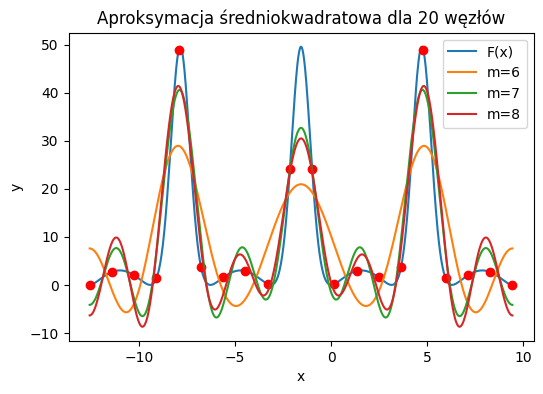

,m=6,m=7,m=8
Błąd bezwzględny,28.6236,16.8823,19.0800
Błąd średniokwadratowy,92.6790,29.9357,35.8621


In [23]:
n=20
m=[6,7,8]
display_approximation(f, a,b,n,m, trigonometric_approximation, labels=[],title=f"Aproksymacja średniokwadratowa dla {n} węzłów"
                                                           ,
                      )

['m=12', 'm=13', 'm=14']


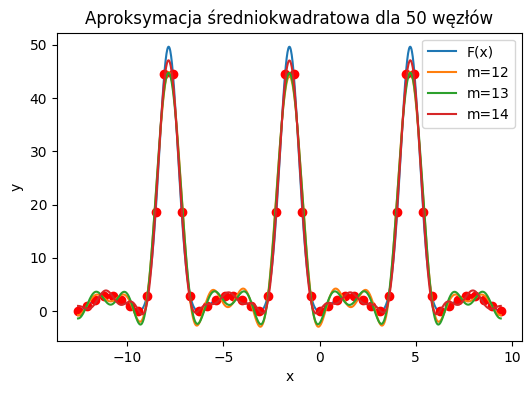

,m=12,m=13,m=14
Błąd bezwzględny,5.5273,4.9213,2.5720
Błąd średniokwadratowy,3.8203,3.6309,0.7506


In [29]:
n = 50
m = [12,13,14]
display_approximation(f, a, b, n, m, trigonometric_approximation, labels=[],
                      title=f"Aproksymacja średniokwadratowa dla {n} węzłów"
,
)

['m=18', 'm=19', 'm=20']


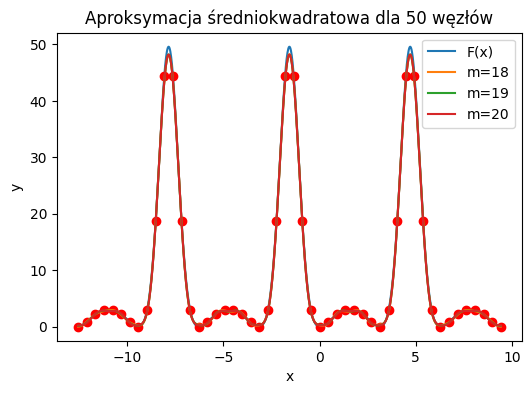

,m=18,m=19,m=20
Błąd bezwzględny,1.4875,1.4404,1.3845
Błąd średniokwadratowy,0.1669,0.1582,0.1564


In [30]:
n = 50
m = [18,19,20]
display_approximation(f, a, b, n, m, trigonometric_approximation, labels=[],
                      title=f"Aproksymacja średniokwadratowa dla {n} węzłów"
,
)

['m=18', 'm=19', 'm=20']


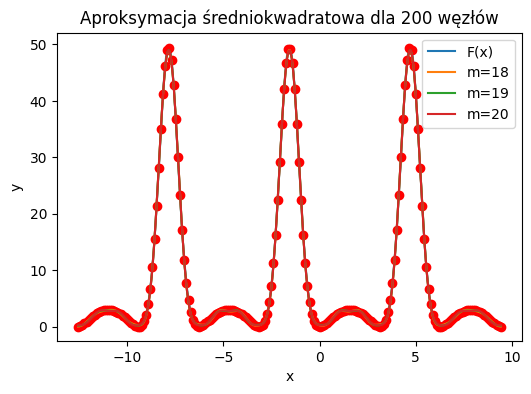

,m=18,m=19,m=20
Błąd bezwzględny,0.7480,0.7003,0.6393
Błąd średniokwadratowy,0.0587,0.0500,0.0481


In [35]:
n = 200
m = [18, 19,20]
display_approximation(f, a, b, n, m, trigonometric_approximation, labels=[],
                      title=f"Aproksymacja średniokwadratowa dla {n} węzłów"
,
)

['m=30', 'm=40', 'm=50']


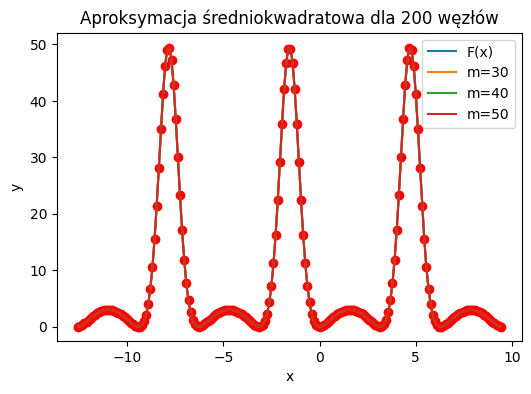

,m=30,m=40,m=50
Błąd bezwzględny,0.2549,0.2483,0.2481
Błąd średniokwadratowy,0.0072,0.0072,0.0072


In [37]:
n = 200
m = [30, 40, 50]
display_approximation(f, a, b, n, m, trigonometric_approximation, labels=[],
                      title=f"Aproksymacja średniokwadratowa dla {n} węzłów"
,
)

['m=3', 'm=4']


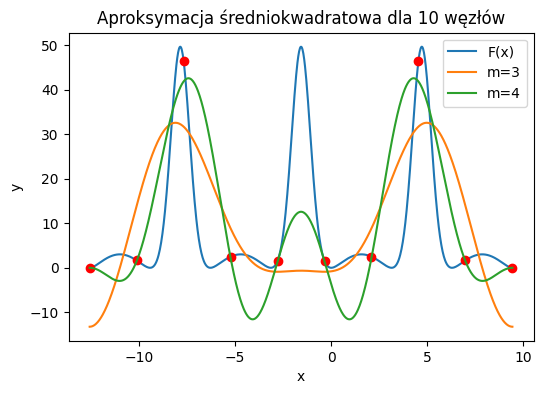

,m=3,m=4
Błąd bezwzględny,50.2330,37.0141
Błąd średniokwadratowy,251.6132,211.1870


In [38]:
n = 10
m = [3,4]
display_approximation(f, a, b, n, m, trigonometric_approximation, labels=[],
                      title=f"Aproksymacja średniokwadratowa dla {n} węzłów"
,
)

['m=3', 'm=4']


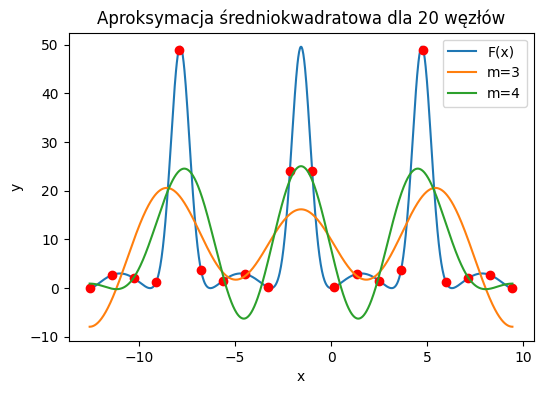

,m=3,m=4
Błąd bezwzględny,33.3901,25.3567
Błąd średniokwadratowy,143.4580,97.1268


In [39]:
n = 20
m = [3,4]
display_approximation(f, a, b, n, m, trigonometric_approximation, labels=[],
                      title=f"Aproksymacja średniokwadratowa dla {n} węzłów"
,
)

['m=3', 'm=4']


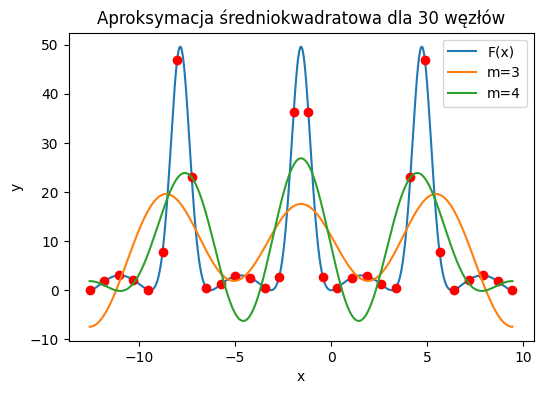

,m=3,m=4
Błąd bezwzględny,32.0023,26.1351
Błąd średniokwadratowy,142.9161,96.3427


In [40]:
n = 30
m = [3,4]
display_approximation(f, a, b, n, m, trigonometric_approximation, labels=[],
                      title=f"Aproksymacja średniokwadratowa dla {n} węzłów"
,
)

['m=3', 'm=4']


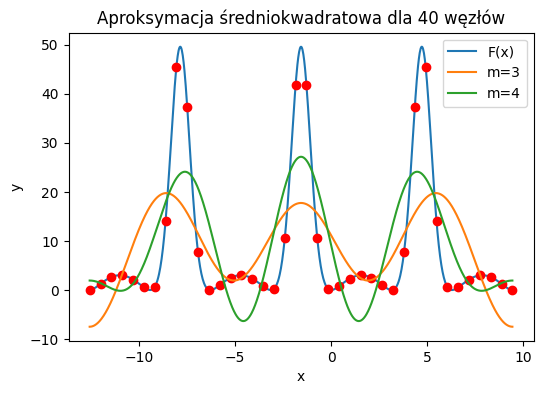

,m=3,m=4
Błąd bezwzględny,31.8363,25.9228
Błąd średniokwadratowy,142.8482,96.2361


In [41]:
n = 40
m = [3,4]
display_approximation(f, a, b, n, m, trigonometric_approximation, labels=[],
                      title=f"Aproksymacja średniokwadratowa dla {n} węzłów"
,
)

['m=20', 'm=30', 'm=40']


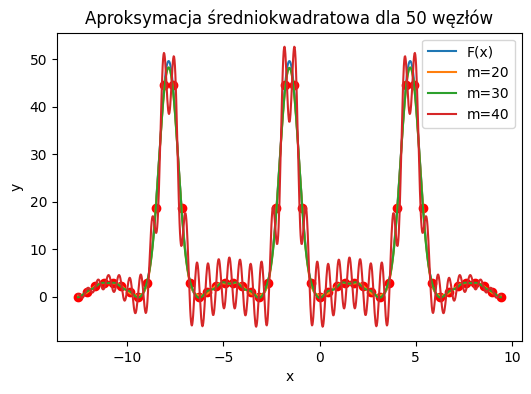

,m=20,m=30,m=40
Błąd bezwzględny,1.4404,1.4398,12.762
Błąd średniokwadratowy,0.1582,0.1569,22.118


In [147]:
n = 50
m = [20,30, 40]
display_approximation(f, a, b, n, m, trigonometric_approximation, labels=[],
                      title=f"Aproksymacja średniokwadratowa dla {n} węzłów"
,
)

['m=20', 'm=30', 'm=40']


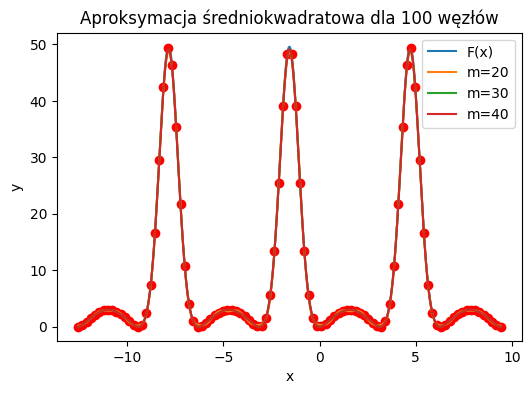

,m=20,m=30,m=40
Błąd bezwzględny,0.9460,0.5039,0.4962
Błąd średniokwadratowy,0.0716,0.0288,0.0288


In [149]:
n = 100
m = [20, 30, 40]
display_approximation(f, a, b, n, m, trigonometric_approximation, labels=[],
                      title=f"Aproksymacja średniokwadratowa dla {n} węzłów"
,
)

['m=20', 'm=30', 'm=40']


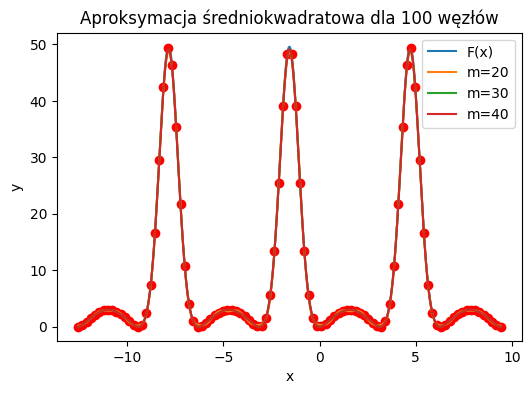

,m=20,m=30,m=40
Błąd bezwzględny,0.9460,0.5039,0.4962
Błąd średniokwadratowy,0.0716,0.0288,0.0288


In [150]:
n = 100
m = [20, 30, 40]
display_approximation(f, a, b, n, m, trigonometric_approximation, labels=[],
                      title=f"Aproksymacja średniokwadratowa dla {n} węzłów"
,
)

['m=20', 'm=30', 'm=40', 'm=200']


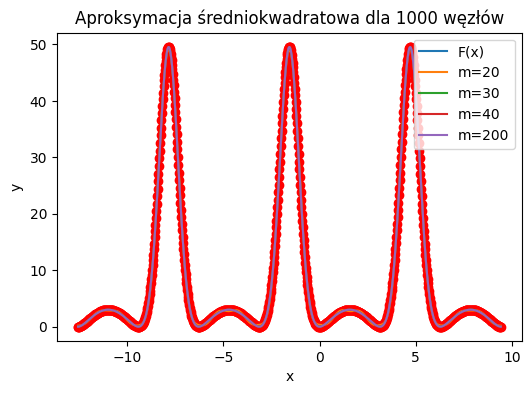

,m=20,m=30,m=40,m=200
Błąd bezwzględny,0.5038,0.0575,0.0499,0.0496
Błąd średniokwadratowy,0.0431,0.0003,0.0003,0.0003


In [153]:
n = 1000
m = [20, 30, 40, 200]
display_approximation(f, a, b, n, m, trigonometric_approximation, labels=[],
                      title=f"Aproksymacja średniokwadratowa dla {n} węzłów"
,
)

['m=9', 'm=12']


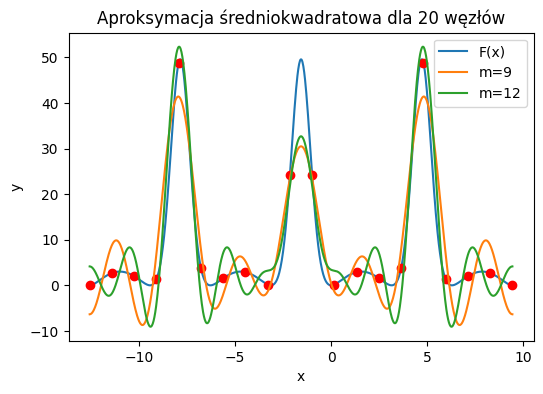

,m=9,m=12
Błąd bezwzględny,19.0800,16.8835
Błąd średniokwadratowy,35.8621,27.6464


In [154]:
n = 20
m = [9,12]
display_approximation(f, a, b, n, m, trigonometric_approximation, labels=[],
                      title=f"Aproksymacja średniokwadratowa dla {n} węzłów"
,
)

['m=20', 'm=30', 'm=50', 'm=100', 'm=150']


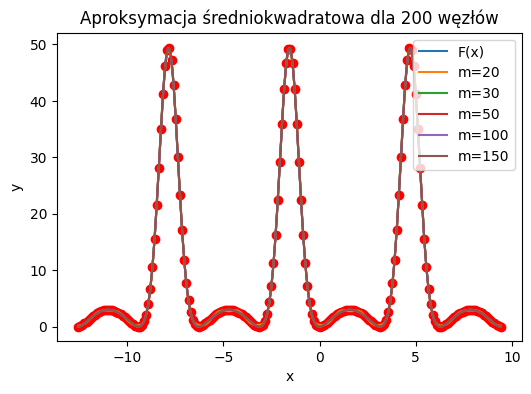

,m=20,m=30,m=50,m=100,m=150
Błąd bezwzględny,0.7003,0.2559,0.2479,0.2480,0.2480
Błąd średniokwadratowy,0.0500,0.0072,0.0072,0.0072,0.0072


In [173]:
n = 200
m = [20,30,50,100,150]
display_approximation(f, a, b, n, m, trigonometric_approximation, labels=[],
                      title=f"Aproksymacja średniokwadratowa dla {n} węzłów"
,
)

In [44]:
ms = [3,4,5,7,12,15,18,20,23,25,30,35,40]
ns = [10, 15, 25, 35, 45, 55, 65, 75, 100]
create_error_table(trigonometric_approximation,ms, ns, count_mse=True, rounded=False)

251.6132092846271
211.1870445285004
256.4283311693192
270.29364973273834
153.43473134176946
115.93914524071883
112.46754263510928
100.9749308522364
142.87980715502002
96.2852718427728
91.19957771324225
26.455338944834896
142.87455003886188
96.27229431430766
91.19128825352428
26.35610076920891
142.82950207131304
96.21063943870126
91.12798032231068
26.274555877539218
142.8062968297343
96.17928884473886
91.09594591712022
26.231927014805766
142.79298419611484
96.16127032357348
91.07756706738724
26.207420332533818
142.78466002938504
96.14996952311712
91.0660561670493
26.192050500273286
142.77373705630438
96.13505541066475
91.05089525978754
26.17177488713299


,10,15,25,35,45,55,65,75,100
3,251.613209,153.434731,142.879807,142.874550,142.829502,142.806297,142.792984,142.784660,142.773737
4,211.187045,115.939145,96.285272,96.272294,96.210639,96.179289,96.161270,96.149970,96.135055
5,256.428331,112.467543,91.199578,91.191288,91.127980,91.095946,91.077567,91.066056,91.050895
7,270.293650,100.974931,26.455339,26.356101,26.274556,26.231927,26.207420,26.192051,26.171775
12,549.593273,185.562046,7.071905,3.938703,3.847045,3.800507,3.773802,3.757046,3.734923
15,737.093053,372.399626,22.368789,0.841904,0.711874,0.664740,0.637737,0.620796,0.598429
18,1092.659835,559.079026,82.520820,0.808467,0.194331,0.146715,0.119659,0.102686,0.080276
20,1247.357374,576.645233,130.252438,3.576087,0.186657,0.136198,0.109139,0.092165,0.069755
23,1458.773926,818.596849,188.632555,11.467906,0.185384,0.098474,0.071395,0.054418,0.032004
25,1648.906602,1011.651093,344.488969,23.682840,0.192540,0.095565,0.068470,0.051492,0.029078
